In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# create dataframe for the datasets
filepath = 'data/nuclear_energy_overview_eia.csv'
df = pd.read_csv(filepath)
df.head()

,Year,Month,"Nuclear Generating Units, Total Operable Units","Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
0,1973,January,Not Available,14.533,6246,3.9,57.8
1,1973,February,Not Available,14.533,5928,4.1,60.7
2,1973,March,Not Available,15.314,6649,4.5,58.4
3,1973,April,Not Available,15.314,5876,4.2,53.4
4,1973,May,Not Available,16.174,5697,3.9,47.3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            614 non-null    int64  
 1   Month                                           614 non-null    object 
 2   Nuclear Generating Units, Total Operable Units  614 non-null    object 
 3   Nuclear Generating Units, Net Summer Capacity   614 non-null    float64
 4   Nuclear Electricity Net Generation              614 non-null    int64  
 5   Nuclear Share of Electricity Net Generation     614 non-null    float64
 6   Nuclear Generating Units, Capacity Factor       614 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 33.7+ KB


In [ ]:
# Replace all instances of 'Not Available' with 'nan' in column: 'Nuclear Generating Units, Total Operable Units'
df['Nuclear Generating Units, Total Operable Units'] = df['Nuclear Generating Units, Total Operable Units'].replace('Not Available', np.nan) # without inplace true

df.head()

,Year,Month,"Nuclear Generating Units, Total Operable Units","Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
0,1973,January,NaN,14.533,6246,3.9,57.8
1,1973,February,NaN,14.533,5928,4.1,60.7
2,1973,March,NaN,15.314,6649,4.5,58.4
3,1973,April,NaN,15.314,5876,4.2,53.4
4,1973,May,NaN,16.174,5697,3.9,47.3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            614 non-null    int64  
 1   Month                                           614 non-null    object 
 2   Nuclear Generating Units, Total Operable Units  372 non-null    object 
 3   Nuclear Generating Units, Net Summer Capacity   614 non-null    float64
 4   Nuclear Electricity Net Generation              614 non-null    int64  
 5   Nuclear Share of Electricity Net Generation     614 non-null    float64
 6   Nuclear Generating Units, Capacity Factor       614 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 33.7+ KB


In [14]:
missing_in_col = df['Nuclear Generating Units, Total Operable Units'].isna().sum()
print(f'There are {missing_in_col} missing values in that column')

There are 242 missing values in that column


In [15]:
# Drop column: 'Nuclear Generating Units, Total Operable Units'
df = df.drop(columns=['Nuclear Generating Units, Total Operable Units'])
df.head()

,Year,Month,"Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
0,1973,January,14.533,6246,3.9,57.8
1,1973,February,14.533,5928,4.1,60.7
2,1973,March,15.314,6649,4.5,58.4
3,1973,April,15.314,5876,4.2,53.4
4,1973,May,16.174,5697,3.9,47.3


In [16]:
# convert the month column to datetime
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')
df = df.sort_values('Date')
df.set_index('Date', inplace=True) # modify the dataframe directly so no copy is returned
df.head()

,Year,Month,"Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
Date,,,,,,
1973-01-01,1973,January,14.533,6246,3.9,57.8
1973-02-01,1973,February,14.533,5928,4.1,60.7
1973-03-01,1973,March,15.314,6649,4.5,58.4
1973-04-01,1973,April,15.314,5876,4.2,53.4
1973-05-01,1973,May,16.174,5697,3.9,47.3


In [17]:
df.describe()

,Year,"Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1998.084691,85.607122,49806.475570,17.216612,76.496254
std,14.782137,23.286221,19647.098419,4.175843,16.281111
min,1973.000000,14.533000,5697.000000,3.900000,34.600000
25%,1985.000000,78.707750,31481.500000,15.525000,61.025000
50%,1998.000000,98.533000,57362.000000,18.800000,79.150000
75%,2011.000000,99.628000,65169.250000,20.100000,91.875000
max,2024.000000,102.206000,74649.000000,22.900000,101.600000


In [19]:
df.columns

Index(['Year', 'Month', 'Nuclear Generating Units, Net Summer Capacity',
       'Nuclear Electricity Net Generation',
       'Nuclear Share of Electricity Net Generation',
       'Nuclear Generating Units, Capacity Factor'],
      dtype='object')

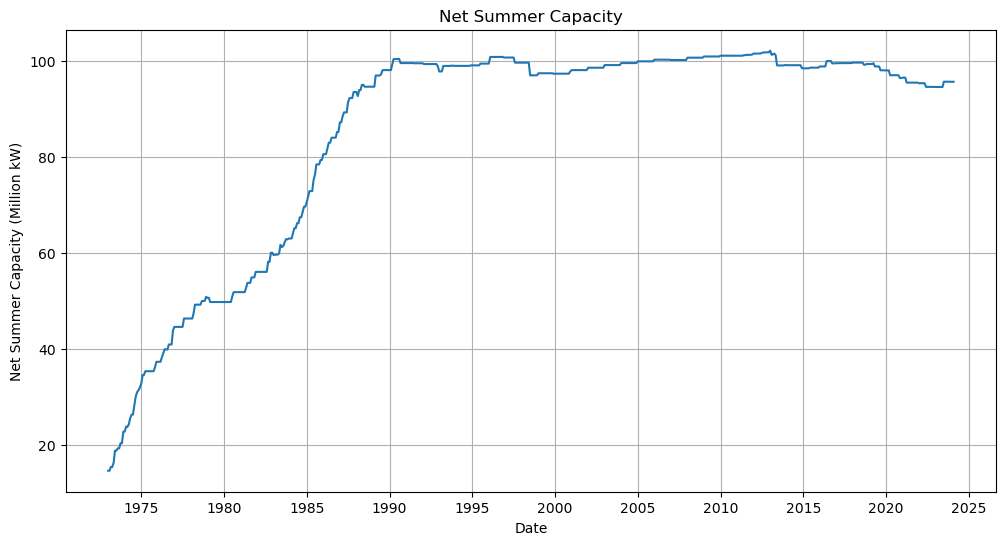

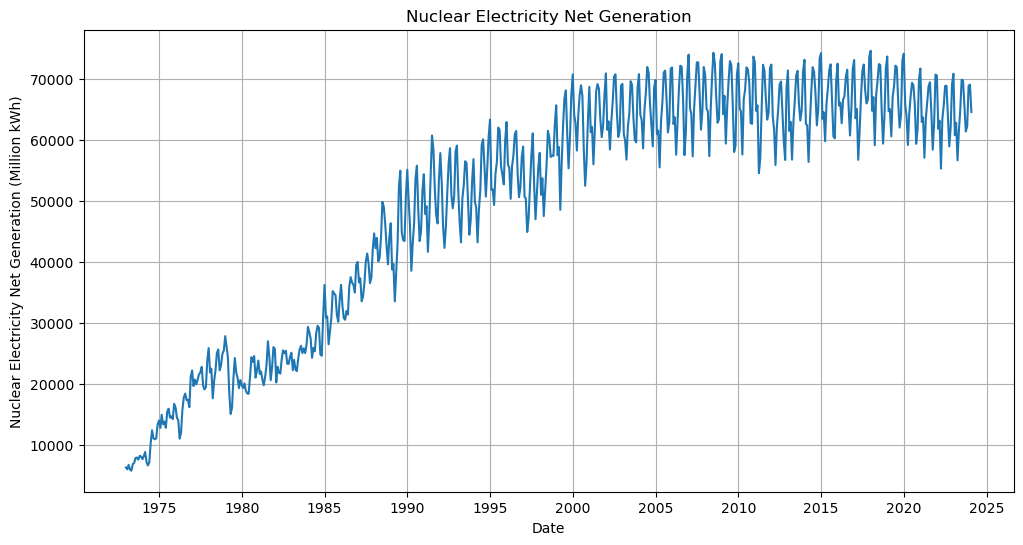

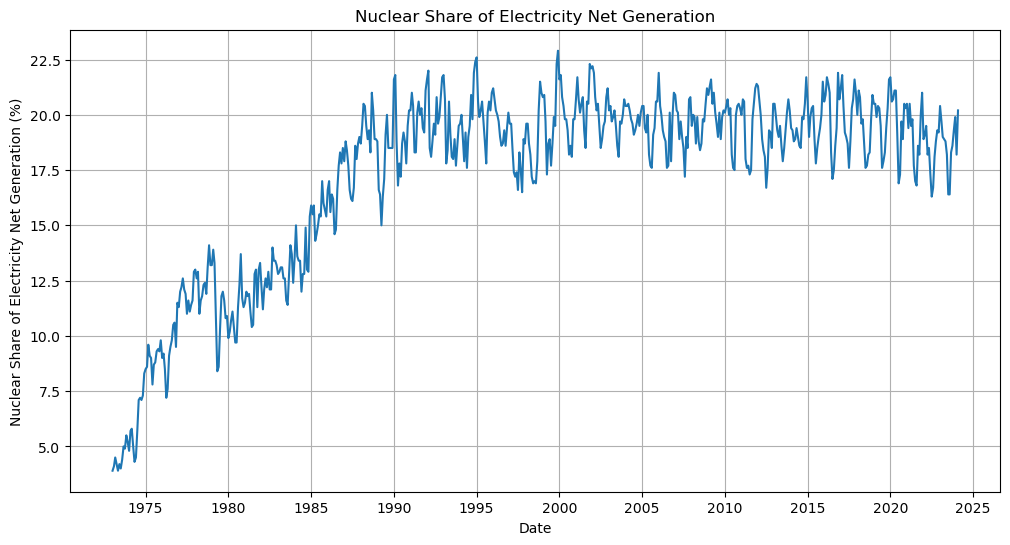

In [34]:
# Timeseries data
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))
plt.title('Net Summer Capacity')
sns.lineplot(x='Date', y='Nuclear Generating Units, Net Summer Capacity', data=df)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # major tick every 5 years
plt.ylabel('Net Summer Capacity (Million kW)')
plt.grid(True)

plt.figure(figsize=(12,6))
plt.title('Nuclear Electricity Net Generation')
sns.lineplot(x='Date', y='Nuclear Electricity Net Generation', data=df)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # major tick every 5 years
plt.ylabel('Nuclear Electricity Net Generation (Million kWh)')
plt.grid(True)

plt.figure(figsize=(12,6))
plt.title('Nuclear Share of Electricity Net Generation')
sns.lineplot(x='Date', y='Nuclear Share of Electricity Net Generation', data=df)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # major tick every 5 years
plt.ylabel('Nuclear Share of Electricity Net Generation (%)')
plt.grid(True)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_3988\2125850792.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


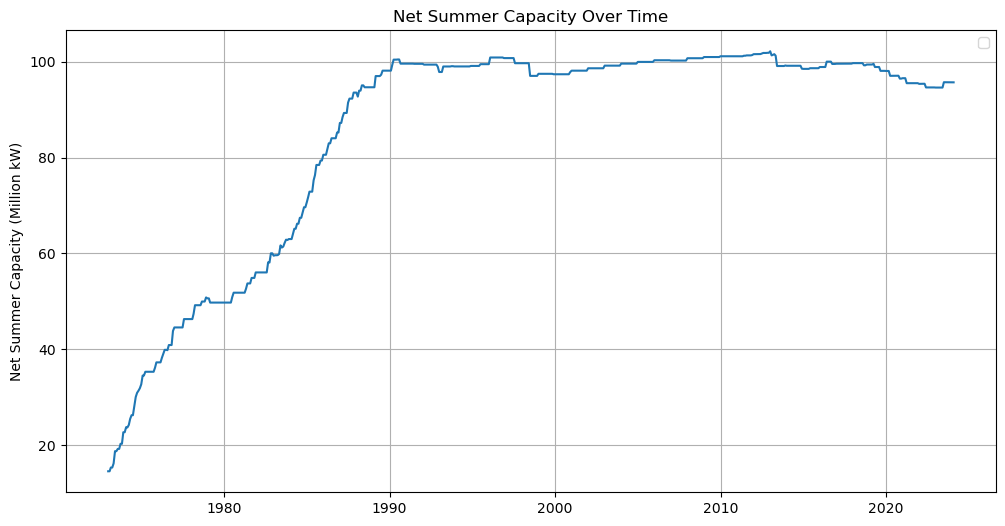